In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

<BarContainer object of 10 artists>

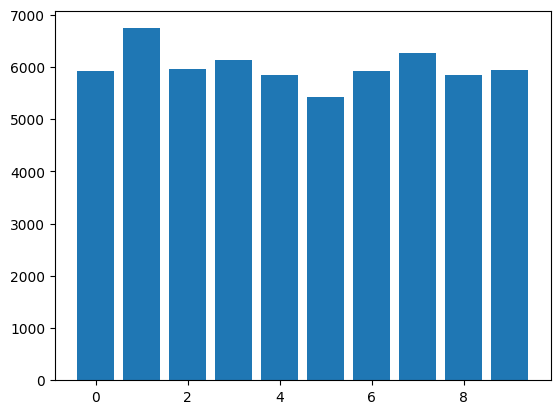

In [3]:
# Import MINST dataset
from tensorflow.keras.datasets import mnist
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()
# Scale the data because we are using a gradient descent algorithm
X_train, X_test = X_train/255.0, X_test/255.0
# We have a good mix of different classes
import collections
count = collections.Counter(Y_train)
plt.bar(count.keys(), count.values())

In [4]:
# We have 28x28 pixel handwritten digits. 60k in train set, 10k in the test set
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)
print(np.unique(Y_train))

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)
[0 1 2 3 4 5 6 7 8 9]


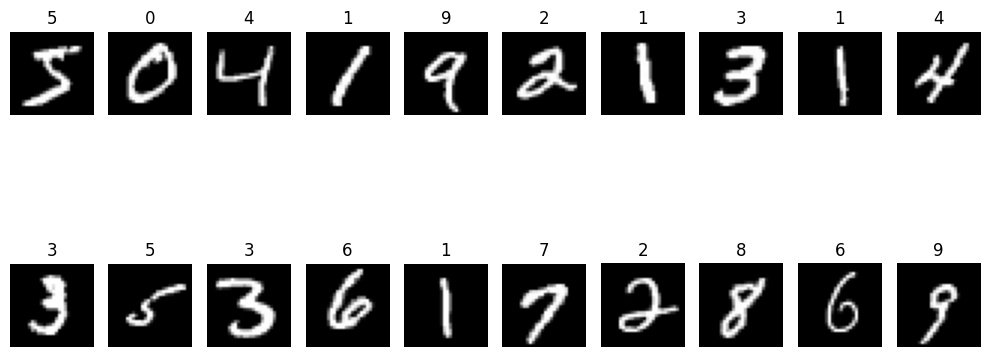

In [5]:
# Plot these data and see what they look like
fig, axes = plt.subplots(2, 10, figsize=(10, 6))
for i in range(20):
    axes[i//10, i %10].imshow(X_train[i], cmap='gray');
    axes[i//10, i %10].axis('off')
    axes[i//10, i %10].set_title(Y_train[i])
plt.tight_layout()

In [6]:
import tensorflow as tf
from tensorflow import keras

# Building and compiling the model
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape = [28,28]),
    keras.layers.Dense(300, activation = 'relu'),
    keras.layers.Dense(100, activation = 'relu'),
    keras.layers.Dense(10, activation = 'softmax')
])

model.compile(loss = "sparse_categorical_crossentropy",
              optimizer = 'sgd',
              metrics = ['accuracy']
              )


In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [8]:
# Fit the model
history = model.fit(X_train, Y_train, epochs = 30, validation_split=0.1)

Epoch 1/30
1688/1688 [==============================] - 5s 3ms/step - loss: 0.6243 - accuracy: 0.8374 - val_loss: 0.2683 - val_accuracy: 0.9272
Epoch 2/30
1688/1688 [==============================] - 4s 3ms/step - loss: 0.2893 - accuracy: 0.9177 - val_loss: 0.2107 - val_accuracy: 0.9397
Epoch 3/30
1688/1688 [==============================] - 5s 3ms/step - loss: 0.2348 - accuracy: 0.9333 - val_loss: 0.1859 - val_accuracy: 0.9505
Epoch 4/30
1688/1688 [==============================] - 5s 3ms/step - loss: 0.2004 - accuracy: 0.9436 - val_loss: 0.1577 - val_accuracy: 0.9582
Epoch 5/30
1688/1688 [==============================] - 6s 4ms/step - loss: 0.1753 - accuracy: 0.9502 - val_loss: 0.1406 - val_accuracy: 0.9620
Epoch 6/30
1688/1688 [==============================] - 5s 3ms/step - loss: 0.1554 - accuracy: 0.9559 - val_loss: 0.1264 - val_accuracy: 0.9658
Epoch 7/30
1688/1688 [==============================] - 5s 3ms/step - loss: 0.1394 - accuracy: 0.9598 - val_loss: 0.1186 - val_accuracy:

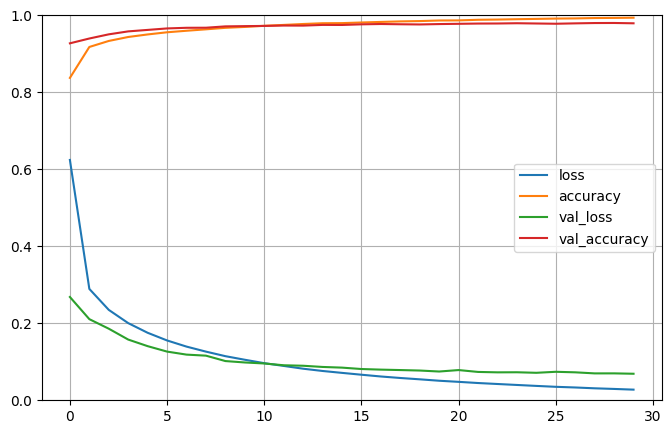

In [9]:
# Look at how learning curves evolve through the epochs
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()